In [1]:
random_state = 16

## Imports

In [2]:
!pip install scikit-learn xgboost 

In [3]:
!pip install pandas numpy seaborn matplotlib yellowbrick scipy

In [4]:
#imports
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError, ResidualsPlot
from yellowbrick.style import set_palette
from yellowbrick.style import rcmod
from sklearn.feature_selection import SelectFromModel

## Data Preprocessing

In [5]:
!ls

clusters2.csv  mlp_2.png			   protherm_groups.csv
DTC_P1.png     my_plot.png			   protherm.ipynb
DTC_P2.png     organisms.png			   protherm_test.csv
EN_P2.png      p1_xgb.txt			   protherm_train.csv
esm_1280       p2_xgb.txt			   test.csv
esm_320        pipeline_1.ipynb			   tm_c_count.png
esm_meltome    pipeline_2.ipynb			   train.csv
groups.csv     preprocessing.ipynb		   Untitled.ipynb
KNN_P1.png     protherm.csv			   XGBoost.ipynb
KNN_P2.png     protherm_deep_physchem.csv	   zero_features.csv
mlp_1.png      protherm_deep_physchem_initial.csv  zero_features_p2.csv


In [6]:
data_set = pd.read_csv('protherm_deep_physchem_initial.csv')
data_set.head()

,Length,Protein_ID,Tm_C,Sequence,AA,AR,RA,AN,NA,AD,...,de_mul,ivywrel,methyl_groups,tighter_packing,hydrophobic,aromatic,charged,beta_branched,h_bond_form,vip
0,468,P00350,57.83,MSKQQIGVVGMAVMGRNLALNIESRGYTVSIFNRSREKTEEVIAEN...,0.014989,0.002141,0.010707,0.006424,0.000000,0.004283,...,0.004191,0.399573,0.393162,0.279915,0.316239,0.106838,0.232906,0.183761,0.096154,0.170940
1,602,P00363,46.77,MQTFQADLAIVGAGGAGLRAAIAAAQANPNAKIALISKVYPMRSHT...,0.018303,0.001664,0.004992,0.008319,0.003328,0.008319,...,0.004249,0.362126,0.382060,0.244186,0.302326,0.107973,0.239203,0.166113,0.091362,0.142857
2,447,P00370,58.78,MDQTYSLESFLNHVQKRDPNQTEFAQAVREVMTTLWPFLEQNPKYR...,0.006726,0.008969,0.002242,0.008969,0.006726,0.006726,...,0.002948,0.351230,0.393736,0.259508,0.333333,0.105145,0.210291,0.170022,0.071588,0.154362
3,206,P00448,66.59,MSYTLPSLPYAYDALEPHFDKQTMEIHHTKHHQTYVNNANAALESL...,0.034146,0.004878,0.000000,0.019512,0.014634,0.004878,...,0.003676,0.330097,0.364078,0.247573,0.320388,0.155340,0.233010,0.121359,0.063107,0.121359
4,761,P00452,44.79,MNQNLLVTKRDGSTERINLDKIHRVLDWAAEGLHNVSISQVELRSH...,0.010526,0.001316,0.005263,0.003947,0.003947,0.002632,...,0.004051,0.388962,0.369251,0.239159,0.320631,0.123522,0.235217,0.168200,0.106439,0.157687


In [7]:
data_set.shape

(6739, 454)

In [8]:
data_set = data_set[data_set['Tm_C'] != 0]

In [9]:
data_set.shape

(6672, 454)

In [10]:
orgs = pd.read_csv('protherm.csv', encoding='latin1')
orgs.head()

,LENGTH,Protein_ID,Tm_C,Organism
0,468,P00350,57.83,E.coli
1,602,P00363,46.77,E.coli
2,447,P00370,58.78,E.coli
3,206,P00448,66.59,E.coli
4,761,P00452,44.79,E.coli


In [11]:
orgs = orgs[['Organism', 'Protein_ID', 'Tm_C']]
orgs = orgs.drop_duplicates(subset = "Protein_ID")
orgs = pd.merge(orgs, data_set['Protein_ID'], on = "Protein_ID")
orgs = orgs.dropna()
orgs.shape

(6672, 3)

In [12]:
orgs.head()

,Organism,Protein_ID,Tm_C
0,E.coli,P00350,57.83
1,E.coli,P00363,46.77
2,E.coli,P00370,58.78
3,E.coli,P00448,66.59
4,E.coli,P00452,44.79


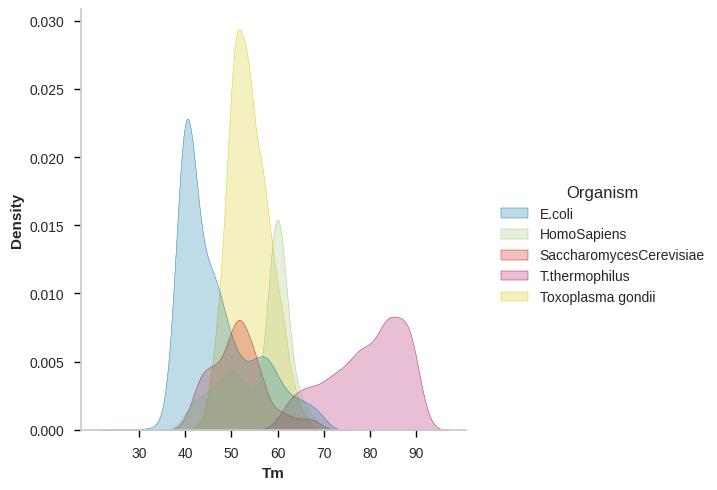

In [13]:
sns.displot(orgs, x="Tm_C", hue="Organism", kind="kde", fill=True)
plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)
plt.ylabel('Density', fontweight='bold')
plt.xlabel('Tm', fontweight='bold')
plt.xticks(range(30, 100, 10))
plt.tick_params(axis="x", direction="out", length = 5, color = 'black')
plt.tick_params(axis="y", direction="out", length = 5, color = 'black')
plt.savefig('organisms.png')
plt.show()

In [14]:
data_set.shape

(6672, 454)

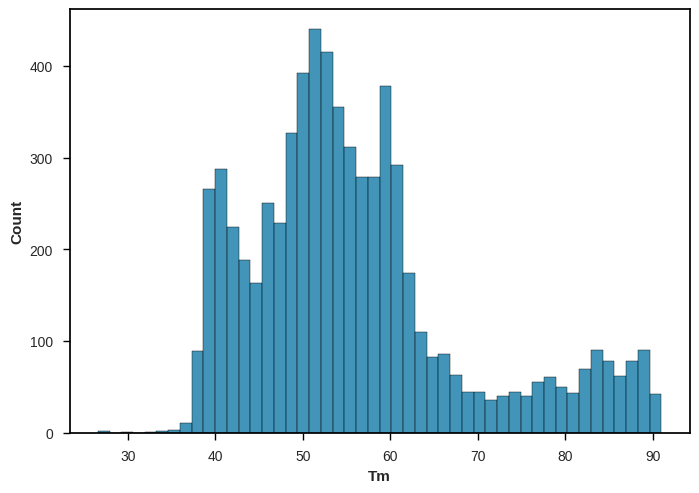

In [15]:
fig = plt.figure()
ax = fig.gca()
plt.rcParams["axes.edgecolor"] = 'black'
plt.grid(False)
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Tm', fontweight='bold')
plt.xticks(range(30, 120, 10))
ax.tick_params(axis="x", direction="out", length = 5, color = 'black')
ax.tick_params(axis="y", direction="out", length = 5, color = 'black')
sns.histplot(data=data_set, x='Tm_C')

plt.savefig('tm_c_count.png')
plt.show()

## Excluding highly correlated features

In [16]:
correlation_boundary = 0.9
def find_correlated_features(X, boundary):
    correlated_features = set()
    correlation = X.corr(method='pearson')

    for i in range(len(correlation.columns)):
        for j in range(i):
            if correlation.iloc[i, j] > boundary and correlation.iloc[i, j] != 1:
                column_name = correlation.columns[i]
                correlated_features.add(column_name)
    return correlated_features
correlated_features = find_correlated_features(data_set.drop(['Protein_ID', 'Sequence', 'Tm_C'], axis = 1), correlation_boundary)
data_set = data_set.drop(columns=correlated_features, axis=1).copy()

print(data_set.shape)

print("excluded correlated features: ", correlated_features)

(6672, 449)
excluded correlated features:  {'number_of_AA_TMHs', 'molecular_weight', 'charged', 'aromatic', 'epsilon_with_disulfide'}


In [17]:
data_set['kr_ratio'] = data_set['kr_ratio'].fillna(0)

In [18]:
data_set.shape

(6672, 449)

In [19]:
data_set = data_set.reset_index(drop = True)

## Clusterization

In [20]:
clusters = pd.read_csv('clusters2.csv', index_col = 0)
clusters.head()

,cluster#,Protein_ID
0,0,P00363
1,1,P00370
2,2,P00509
3,3,P00582
4,4,P00634


In [21]:
data_set.shape, clusters.shape

((6672, 449), (6672, 2))

In [22]:
data_set = pd.merge(data_set, clusters, on = 'Protein_ID')
data_set.shape

(6672, 450)

In [23]:
data_set.head()

,Length,Protein_ID,Tm_C,Sequence,AA,AR,RA,AN,NA,AD,...,oxidized-reduced,de_mul,ivywrel,methyl_groups,tighter_packing,hydrophobic,beta_branched,h_bond_form,vip,cluster#
0,468,P00350,57.83,MSKQQIGVVGMAVMGRNLALNIESRGYTVSIFNRSREKTEEVIAEN...,0.014989,0.002141,0.010707,0.006424,0.000000,0.004283,...,125,0.004191,0.399573,0.393162,0.279915,0.316239,0.183761,0.096154,0.170940,3092
1,602,P00363,46.77,MQTFQADLAIVGAGGAGLRAAIAAAQANPNAKIALISKVYPMRSHT...,0.018303,0.001664,0.004992,0.008319,0.003328,0.008319,...,625,0.004249,0.362126,0.382060,0.244186,0.302326,0.166113,0.091362,0.142857,0
2,447,P00370,58.78,MDQTYSLESFLNHVQKRDPNQTEFAQAVREVMTTLWPFLEQNPKYR...,0.006726,0.008969,0.002242,0.008969,0.006726,0.006726,...,250,0.002948,0.351230,0.393736,0.259508,0.333333,0.170022,0.071588,0.154362,1
3,206,P00448,66.59,MSYTLPSLPYAYDALEPHFDKQTMEIHHTKHHQTYVNNANAALESL...,0.034146,0.004878,0.000000,0.019512,0.014634,0.004878,...,0,0.003676,0.330097,0.364078,0.247573,0.320388,0.121359,0.063107,0.121359,734
4,761,P00452,44.79,MNQNLLVTKRDGSTERINLDKIHRVLDWAAEGLHNVSISQVELRSH...,0.010526,0.001316,0.005263,0.003947,0.003947,0.002632,...,625,0.004051,0.388962,0.369251,0.239159,0.320631,0.168200,0.106439,0.157687,3093


In [24]:
data_set = data_set.drop(columns=['Protein_ID','Sequence'], axis=1).copy()


In [25]:
data_set.shape

(6672, 448)

In [26]:
X = data_set.drop(columns=['Tm_C', 'cluster#'], axis=1).copy()
y = data_set['Tm_C'].copy()

In [27]:
groups = data_set['cluster#']
print('Total number of different clusters: {}'.format(max(groups)))

Total number of different clusters: 5778


In [28]:
data_set.head()

,Length,Tm_C,AA,AR,RA,AN,NA,AD,DA,AC,...,oxidized-reduced,de_mul,ivywrel,methyl_groups,tighter_packing,hydrophobic,beta_branched,h_bond_form,vip,cluster#
0,468,57.83,0.014989,0.002141,0.010707,0.006424,0.000000,0.004283,0.004283,0.000000,...,125,0.004191,0.399573,0.393162,0.279915,0.316239,0.183761,0.096154,0.170940,3092
1,602,46.77,0.018303,0.001664,0.004992,0.008319,0.003328,0.008319,0.003328,0.000000,...,625,0.004249,0.362126,0.382060,0.244186,0.302326,0.166113,0.091362,0.142857,0
2,447,58.78,0.006726,0.008969,0.002242,0.008969,0.006726,0.006726,0.006726,0.004484,...,250,0.002948,0.351230,0.393736,0.259508,0.333333,0.170022,0.071588,0.154362,1
3,206,66.59,0.034146,0.004878,0.000000,0.019512,0.014634,0.004878,0.004878,0.000000,...,0,0.003676,0.330097,0.364078,0.247573,0.320388,0.121359,0.063107,0.121359,734
4,761,44.79,0.010526,0.001316,0.005263,0.003947,0.003947,0.002632,0.007895,0.003947,...,625,0.004051,0.388962,0.369251,0.239159,0.320631,0.168200,0.106439,0.157687,3093


In [29]:
gkf = GroupKFold(n_splits=5)
for train_index, test_index in gkf.split(X, y, groups):
    print(train_index, test_index)
    

[   0    1    2 ... 6669 6670 6671] [   8   14   17 ... 6654 6661 6667]
[   0    1    2 ... 6669 6670 6671] [   6    9   23 ... 6656 6662 6668]
[   2    4    5 ... 6669 6670 6671] [   0    1    3 ... 6655 6657 6663]
[   0    1    3 ... 6668 6669 6670] [   2    5    7 ... 6660 6664 6671]
[   0    1    2 ... 6667 6668 6671] [   4   16   18 ... 6666 6669 6670]


In [30]:
data_set_train = data_set.iloc[train_index]
data_set_test = data_set.drop(columns='cluster#').iloc[test_index]

In [31]:
groups = data_set_train['cluster#']

In [32]:
data_set_train.shape, data_set_test.shape, groups.shape

((5338, 448), (1334, 447), (5338,))

In [33]:
data_set_train = data_set_train.drop(columns='cluster#')
data_set_train.to_csv("protherm_train.csv")

In [34]:
data_set_test.to_csv("protherm_test.csv")

In [35]:
groups.to_csv("protherm_groups.csv")